# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS

## Week 8 - Normal modes and Schrodinger equation

In [21]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

In [39]:
# Condições de contorno periodicas

T = omg0_sq* np.array([[2, -1, 0, 0],
                       [-1, 2, -1, 0],
                       [0, -1, 2, -1],
                       [0, 0, -1, 2]])

e, v = np.linalg.eig(T)

print(e)
print(v)

[3.61803399 2.61803399 0.38196601 1.38196601]
[[-0.37174803 -0.60150096 -0.37174803 -0.60150096]
 [ 0.60150096  0.37174803 -0.60150096 -0.37174803]
 [-0.60150096  0.37174803 -0.60150096  0.37174803]
 [ 0.37174803 -0.60150096 -0.37174803  0.60150096]]


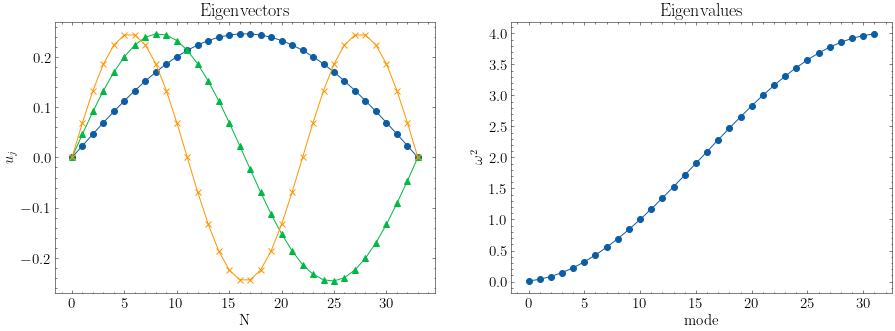

In [26]:
# 32 masses, equal k and m, fixed boundaries

N = 32
k = 1.0
m = 1.0

omg0_sq = k/m

d = 2*omg0_sq*np.ones(N)
e = -omg0_sq*np.ones(N-1)

eigenval, eigenvec = linalg.eigh_tridiagonal(d,e)

def add_boundary(array, bound=0):
    array = np.insert(array, 0, bound)
    array = np.append(array, bound)
    return array


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(add_boundary(eigenvec.T[0]), marker='o')
plt.plot(add_boundary(eigenvec.T[1]), marker='^')
plt.plot(add_boundary(eigenvec.T[2]), marker='x')
plt.ylabel('$u_j$')
plt.xlabel('N')
plt.title('Eigenvectors')

plt.subplot(1,2,2)
plt.plot(eigenval, marker='o')
plt.ylabel('$\omega^2$')
plt.xlabel('mode')
plt.title('Eigenvalues')

plt.show()

In [41]:
# Condições de contorno periodicas

T = omg0_sq* np.array([[2, -1, 0, -1],
                       [-1, 2, -1, 0],
                       [0, -1, 2, -1],
                       [-1, 0, -1, 2]])

e, v = np.linalg.eigh(T)

print(e)
print(v)

[-7.54604712e-16  2.00000000e+00  2.00000000e+00  4.00000000e+00]
[[-5.00000000e-01  7.07106781e-01  0.00000000e+00 -5.00000000e-01]
 [-5.00000000e-01 -1.77885755e-16 -7.07106781e-01  5.00000000e-01]
 [-5.00000000e-01 -7.07106781e-01  2.87079964e-16 -5.00000000e-01]
 [-5.00000000e-01  1.09194209e-16  7.07106781e-01  5.00000000e-01]]


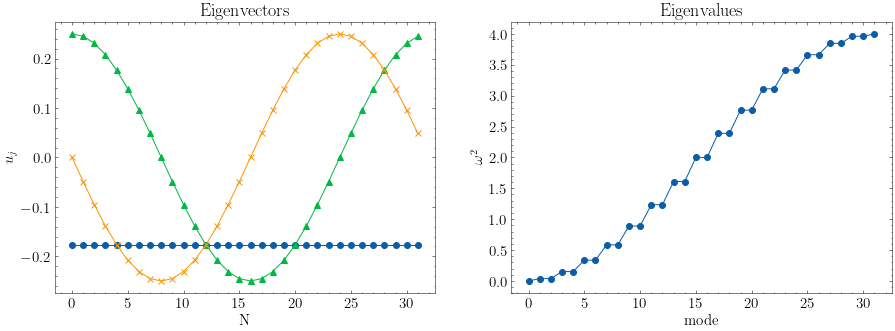

In [44]:
# Making trigonal banded matrices

N = 32

T = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if i == j:
            T[i][j] = 2.0
        elif i == j+1 or i == j-1:
            T[i][j] = -1.0

T[0][-1] = -1.0
T[-1][0] = -1.0

e, v = linalg.eigh(T)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(v.T[0], marker='o')
plt.plot(v.T[1], marker='^')
plt.plot(v.T[2], marker='x')
plt.ylabel('$u_j$')
plt.xlabel('N')
plt.title('Eigenvectors')

plt.subplot(1,2,2)
plt.plot(e, marker='o')
plt.ylabel('$\omega^2$')
plt.xlabel('mode')
plt.title('Eigenvalues')

plt.show()

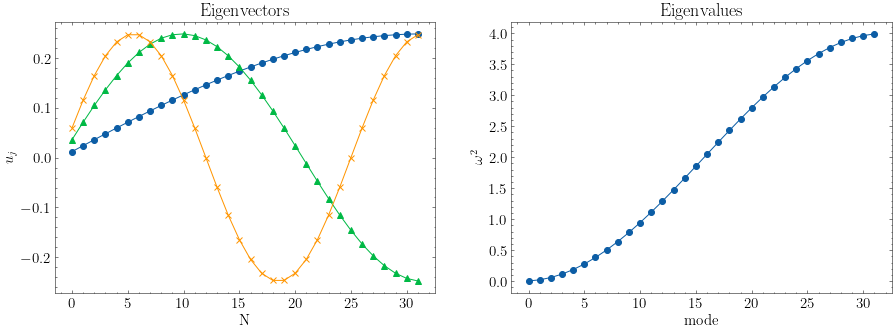

In [47]:
# Extremidade livre

N = 32

T = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if i == j:
            T[i][j] = 2.0
        elif i == j+1 or i == j-1:
            T[i][j] = -1.0

T[-1][-1] = 1.0

e, v = linalg.eigh(T)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(v.T[0], marker='o')
plt.plot(v.T[1], marker='^')
plt.plot(v.T[2], marker='x')
plt.ylabel('$u_j$')
plt.xlabel('N')
plt.title('Eigenvectors')

plt.subplot(1,2,2)
plt.plot(e, marker='o')
plt.ylabel('$\omega^2$')
plt.xlabel('mode')
plt.title('Eigenvalues')

plt.show()

In [ ]:
# Animating normal mode

In [ ]:
# Massas alternadas

In [ ]:
# Schrodinger: poço infinito

In [ ]:
# Schrodinger: potencial parabólico

In [ ]:
# Schrodinger: barreira de potencial